The aim of this project is to use Linear regression, to figure out how to maximize the Yearly Amount spent by the customers.

In [2]:
#Importing all relavent Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
customers = pd.read_csv("Ecommerce Customers.csv")

In [4]:
#Dataset info
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


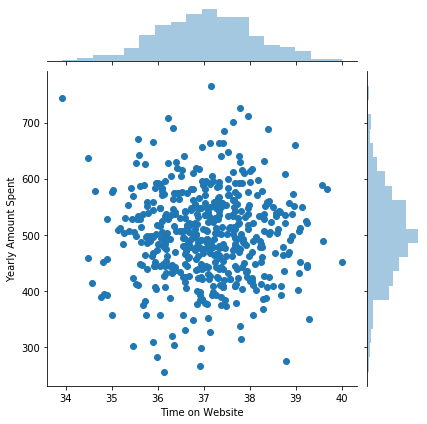

In [5]:
#Scatter plot of Yearly Amount Spent vs Time on Website. 
sns.jointplot(customers['Time on Website'],customers['Yearly Amount Spent'])

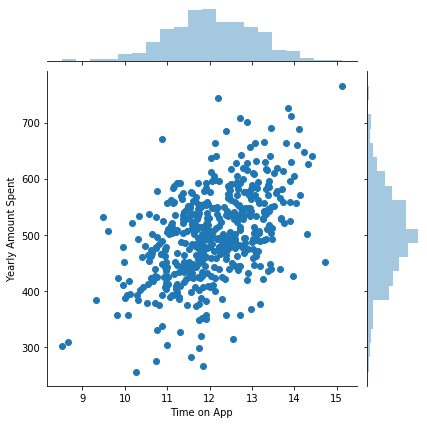

In [6]:
#Scatter plot of Yearly Amount Spent vs Time on App. 
sns.jointplot(customers['Time on App'],customers['Yearly Amount Spent'])

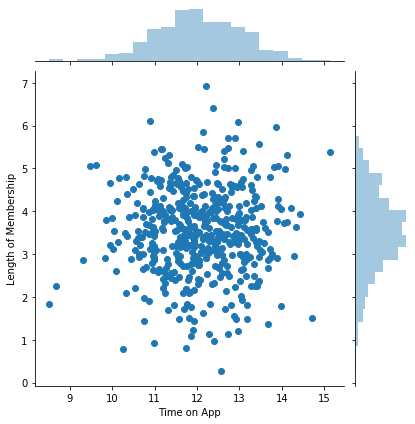

In [7]:
sns.jointplot(customers['Time on App'],customers['Length of Membership'])

Since all the 3 jointplots a we plotted above are in circular shape, we can conclude that there is no significant correlation between these two variables

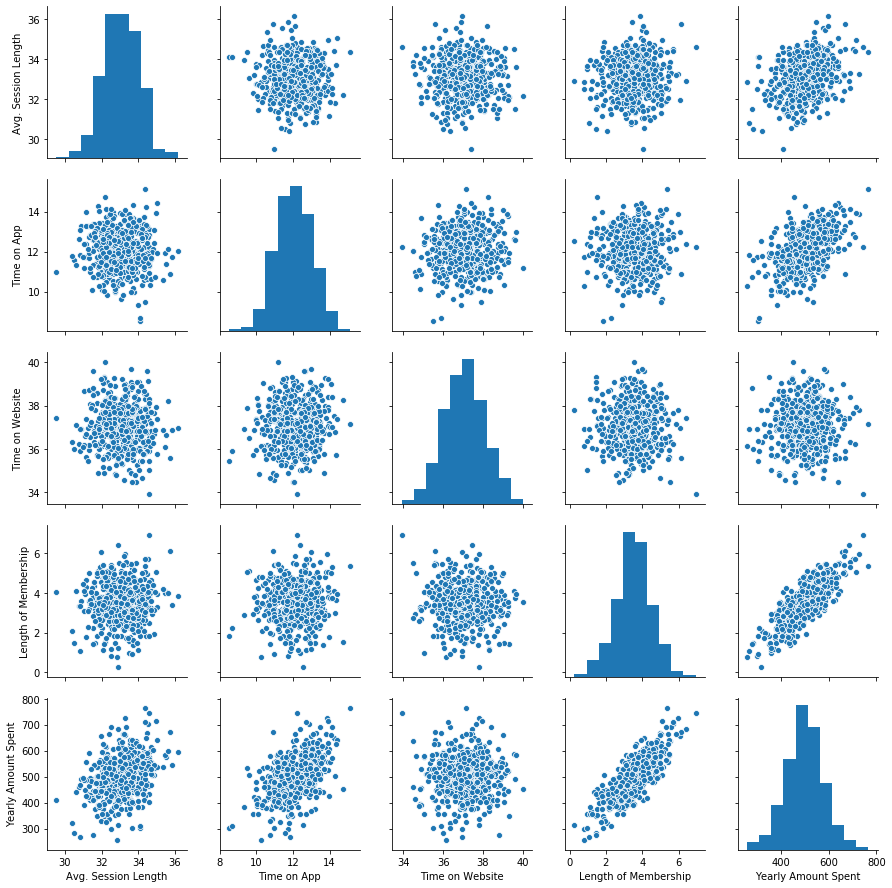

In [8]:
#Plot the pair plot to see correlation of features against each other
sns.pairplot(customers)

From the above plot, the correlation between the Length of Membership and Yealy Amount Spent looks better than other features.  It implies, longer a customer remains a member, the higher the yearly amount spent is going to be

In [9]:
#Using Linear Regression to predict the amount of money spent based on the other variable.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x=customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y=customers['Yearly Amount Spent']

#Splitting the data into training and testing data with a ratio of 60:40
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

#Creating a Linear Regression model
lm = LinearRegression()
lm.fit(x_train,y_train)
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df


,Coefficient
Avg. Session Length,26.050435
Time on App,39.322106
Time on Website,0.431939
Length of Membership,61.221133


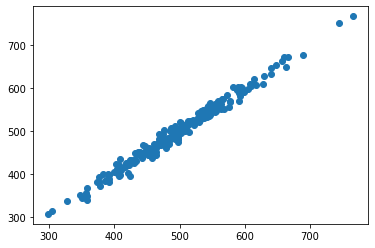

In [10]:
#Predicting the output using the model
predictions = lm.predict(x_test)
plt.scatter(y_test,predictions)

The above plot shows that the model is performing well.Below, we will evaluate the model using different performance metrics. We would be calculating Mean Absolute Error, Mean Squared Error and Root Mean Squared Error.

In [11]:
#Evaluating the results using different metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print('Variance Score:',metrics.explained_variance_score(y_test,predictions))

MAE: 8.385087343071582
MSE: 109.13729430185482
RMSE: 10.446879644269615
Variance Score: 0.9832975990634972


(array([ 5.,  9., 17., 42., 43., 35., 26., 14.,  8.,  1.]),
 array([-27.87721882, -22.22027113, -16.56332345, -10.90637576,
         -5.24942807,   0.40751961,   6.0644673 ,  11.72141499,
         17.37836267,  23.03531036,  28.69225805]),
 <a list of 10 Patch objects>)

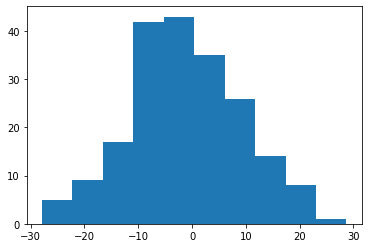

In [12]:
#Plotting the histogram for difference in predictions
plt.hist((y_test-predictions))

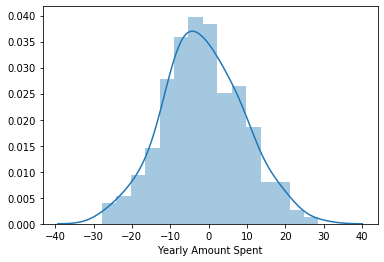

In [13]:
#Plotting the pdf distplot for difference in prediction
sns.distplot((y_test-predictions),bins=15);

Finding how to boost the yearly amount spent by the customers

In [16]:
cdf=pd.DataFrame(lm.coef_,x_train.columns,columns=['Coeff'] )
cdf

,Coeff
Avg. Session Length,26.050435
Time on App,39.322106
Time on Website,0.431939
Length of Membership,61.221133


Conclusion: 

1) The difference in the prediction are normally distributed, So we can conclude that our model is acceptable     

2) The above results show that the largest increase of approximately $61.5 is observed when the "Length of Membership" is increased.    

3) Using the predictions above, we can develop ways, to increase yearly amount spent by the customers by focusing on    
i) customer relationship so that people remain members for long periods of time    
ii) finding ways to increase the time a customer spends on App.    
iii) Finding ways to make the app experience smooth so that customer stays in the session for long time   